## **Práctica 2: Reglas de asociación**

Nombre: Barreiro Valdez Alejandro

Email: alex.barreiro.v@gmail.com

**Objetivo**

Analizar las transacciones y obtener reglas significativas (patrones) de los productos vendidos en un comercio minorista en Francia.
Los datos son transacciones de un comercio de un periodo de una semana (7 días).

**Características:**

* Ítems (20 productos)
* 7500 transacciones


Fuente de datos: store_data.csv

#### **1) Importar las bibliotecas necesarias**

In [1]:
!pip install apyori  # pip es un administrador de paquetes de Python. Se instala el paquete Apyori

In [2]:
import pandas as pd                 # Para la manipulación y análisis de los datos
import numpy as np                  # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt     # Para la generación de gráficas a partir de los datos
from apyori import apriori

#### **2) Importar los datos**

In [3]:
DatosTransacciones = pd.read_csv('store_data.csv')
DatosTransacciones

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observaciones:**

1) Se observa que el encabezado es la primera transacción.

2) NaN indica que esa película no fue rentada o comprada en esa transacción.

In [4]:
DatosTransacciones = pd.read_csv('store_data.csv', header=None)
DatosTransacciones.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **3) Procesamiento de los datos**

**Exploración**

Antes de ejecutar el algoritmo es recomendable observar la distribución de la frecuencia de los elementos.

In [5]:
#Se incluyen todas las transacciones en una sola lista
Transacciones = DatosTransacciones.values.reshape(-1).tolist() #-1 significa 'dimensión desconocida'

#Se crea una matriz (dataframe) usando la lista y se incluye una columna 'Frecuencia'
Lista = pd.DataFrame(Transacciones)
Lista['Frecuencia'] = 1

#Se agrupa los elementos
Lista = Lista.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True) #Conteo
Lista['Porcentaje'] = (Lista['Frecuencia'] / Lista['Frecuencia'].sum()) #Porcentaje
Lista = Lista.rename(columns={0 : 'Item'})

#Se muestra la lista
Lista

,Item,Frecuencia,Porcentaje
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000238
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041889
43,french fries,1282,0.043660
100,spaghetti,1306,0.044478
37,eggs,1348,0.045908


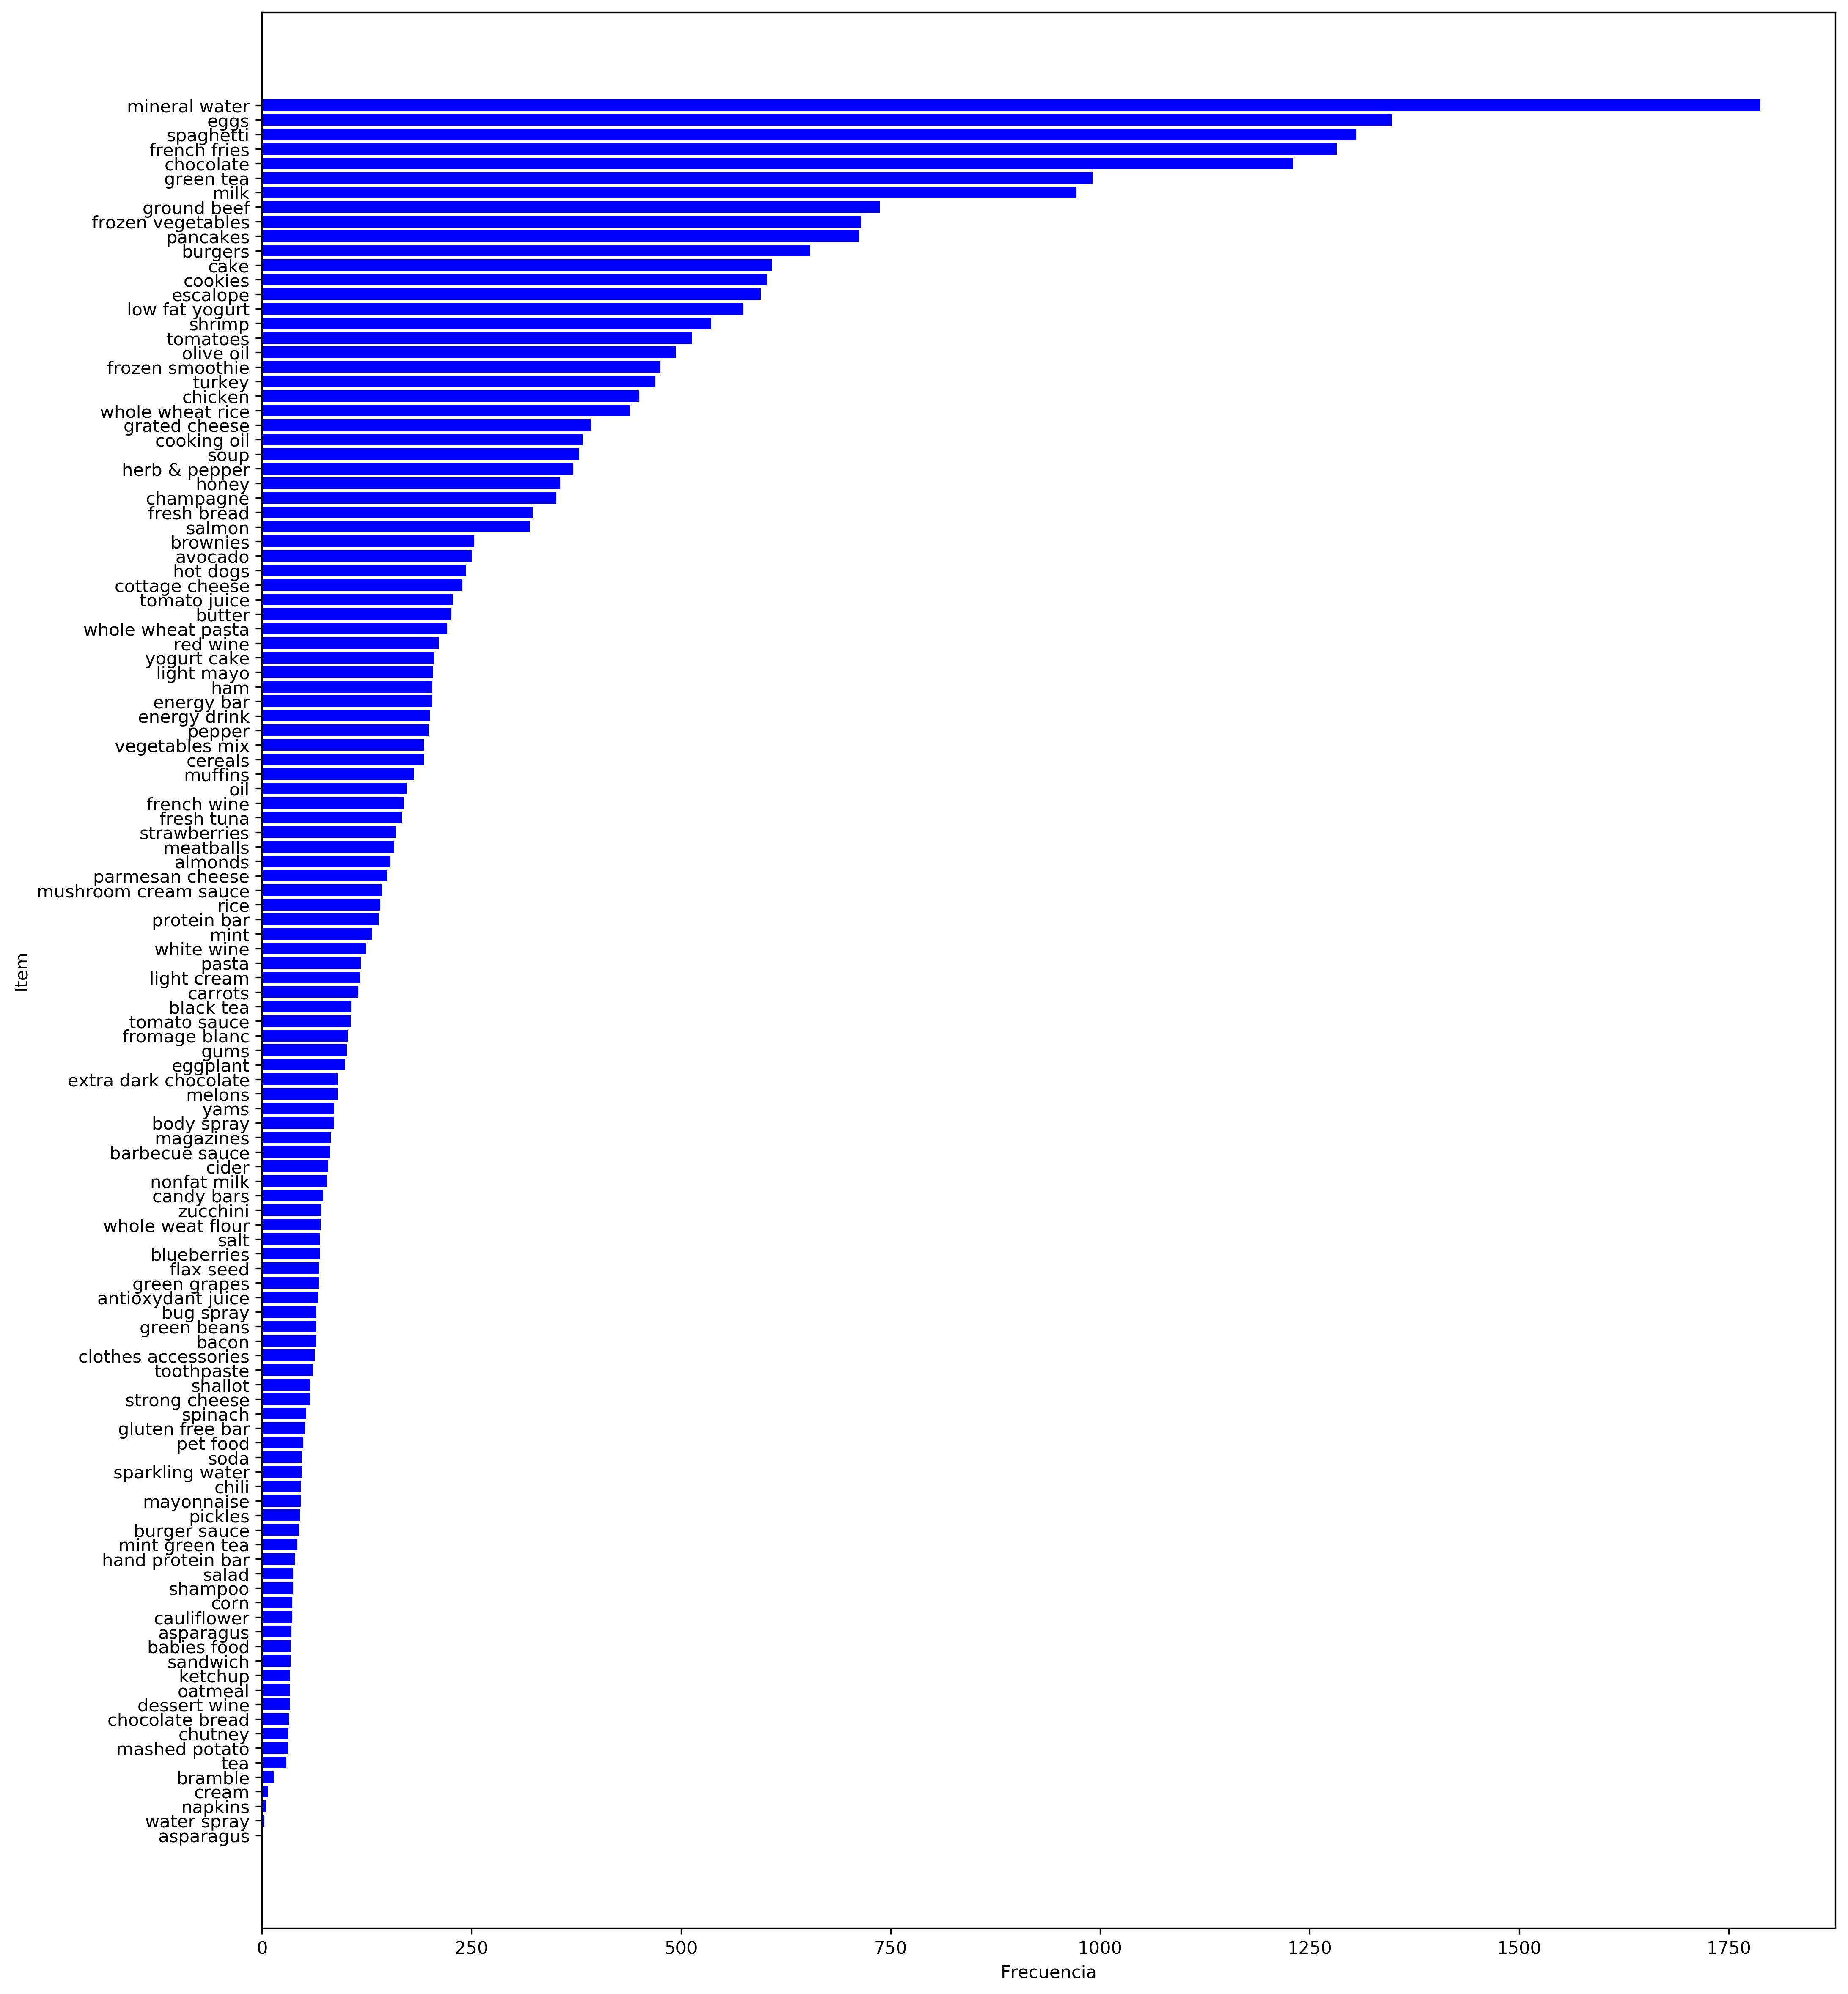

In [6]:
# Se genera un gráfico de barras
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(Lista['Item'], width=Lista['Frecuencia'], color='blue')
plt.show()

In [7]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
TransaccionesLista = DatosTransacciones.stack().groupby(level=0).apply(list).tolist()
TransaccionesLista 

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

#### **4) Aplicación del algoritmo**

**Configuración 1**

Obtener reglas para aquellos artículos que se compran al menos 5 veces al día, entonces, 5 x 7 = 35 veces en una semana, entonces:

i) El soporte mínimo se calcula de 35/7500 = 0.0045 (0.45%).

ii) La confianza mínima para las reglas de 20%

iii) La elevación de 3.

In [8]:
ReglasC1 = apriori(TransaccionesLista, 
                   min_support=0.0045, 
                   min_confidence=0.2, 
                   min_lift=3)

Se convierte las reglas encontradas por la clase apriori en una lista, puesto que es más fácil ver los resultados.

In [9]:
ResultadosC1 = list(ReglasC1)
print(len(ResultadosC1)) #Total de reglas encontradas 

24


In [10]:
ResultadosC1

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

Son 24 reglas. A manera de ejemplo se imprime la primera regla:

In [11]:
print(ResultadosC1[0])

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


La primera regla contiene dos elementos **chicken** y **light cream** que exclusivamente se compran juntos.

* Esto tiene sentido, las personas que compran crema ligera tienen cuidado con lo que comen, por lo que, es probable que compren pollo, en lugar de carne roja.

* El soporte es de 0.0045, la confianza de 0.2905, la elevación de 4.84, esto es, 4.84 veces más posibilidad de que compren crema ligera.

In [12]:
print(ResultadosC1[1])
print(ResultadosC1[2])

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])
RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])


In [13]:
for item in ResultadosC1:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'light cream', 'chicken'})
Soporte: 0.004532728969470737
Confianza: 0.29059829059829057
Lift: 4.84395061728395
Regla: frozenset({'escalope', 'mushroom cream sauce'})
Soporte: 0.005732568990801226
Confianza: 0.3006993006993007
Lift: 3.790832696715049
Regla: frozenset({'escalope', 'pasta'})
Soporte: 0.005865884548726837
Confianza: 0.3728813559322034
Lift: 4.700811850163794
Regla: frozenset({'herb & pepper', 'ground beef'})
Soporte: 0.015997866951073192
Confianza: 0.3234501347708895
Lift: 3.2919938411349285
Regla: frozenset({'tomato sauce', 'ground beef'})
Soporte: 0.005332622317024397
Confianza: 0.3773584905660377
Lift: 3.840659481324083
Regla: frozenset({'whole wheat pasta', 'olive oil'})
Soporte: 0.007998933475536596
Confianza: 0.2714932126696833
Lift: 4.122410097642296
Regla: frozenset({'pasta', 'shrimp'})
Soporte: 0.005065991201173177
Confianza: 0.3220338983050847
Lift: 4.506672147735896
Regla: frozenset({'shrimp', 'frozen vegetables', 'chocolate'})
Soporte: 0.00533

**Configuración 2**

Obtener reglas para aquellos artículos que se compran al menos 30 veces al día, entonces, 30 x 7 = 210 veces en una semana, entonces:

i) El soporte mínimo se calcula de 210/7500 = 0.028 (2.8%).

ii) La confianza mínima para las reglas de 25%.

iii) La elevación mayor a 1.

In [14]:
ReglasC2 = apriori(TransaccionesLista, 
                   min_support=0.028, 
                   min_confidence=0.25, 
                   min_lift = 1.01)

In [15]:
ResultadosC2 = list(ReglasC2)
print(len(ResultadosC2))

10


In [16]:
ResultadosC2 

[RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)]),
 RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05265964538061592, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.3213995117982099, lift=1.3483320682317521)]),
 RelationRecord(items=frozenset({'mineral water', 'eggs'}), support=0.05092654312758299, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.28338278931750743, lift=1.188844688294532)]),
 RelationRecord(items=frozenset({'frozen vegetables', 'mineral water'}), support=0.03572856952406346, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'mineral water'}), confid

In [17]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)])


La primera regla contiene dos elementos: **hamburguesas** y **huevos** que comúnmente se compran juntos.

* Tiene sentido, algunas personas que compran hamburguesas consumen también huevos, como comida de preparación rápida.

* El soporte es de 0.028 (2.8%), la confianza de 0.33 (33%), la elevación de 1.83, esto es, hay casi 2 veces más probabilidades de que cuando se compre posibilidades se compre también huevos.

In [18]:
print(ResultadosC2[1])
print(ResultadosC2[2])

RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05265964538061592, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.3213995117982099, lift=1.3483320682317521)])
RelationRecord(items=frozenset({'mineral water', 'eggs'}), support=0.05092654312758299, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.28338278931750743, lift=1.188844688294532)])


In [19]:
for item in ResultadosC2:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'burgers', 'eggs'})
Soporte: 0.02879616051193174
Confianza: 0.33027522935779813
Lift: 1.8378297443715457
Regla: frozenset({'mineral water', 'chocolate'})
Soporte: 0.05265964538061592
Confianza: 0.3213995117982099
Lift: 1.3483320682317521
Regla: frozenset({'mineral water', 'eggs'})
Soporte: 0.05092654312758299
Confianza: 0.28338278931750743
Lift: 1.188844688294532
Regla: frozenset({'frozen vegetables', 'mineral water'})
Soporte: 0.03572856952406346
Confianza: 0.37482517482517486
Lift: 1.57246288387228
Regla: frozenset({'mineral water', 'ground beef'})
Soporte: 0.040927876283162246
Confianza: 0.41655359565807326
Lift: 1.7475215442008991
Regla: frozenset({'spaghetti', 'ground beef'})
Soporte: 0.03919477403012932
Confianza: 0.3989145183175034
Lift: 2.291162176033379
Regla: frozenset({'milk', 'mineral water'})
Soporte: 0.04799360085321957
Confianza: 0.3703703703703704
Lift: 1.5537741320739085
Regla: frozenset({'milk', 'spaghetti'})
Soporte: 0.03546193840821224
Confianza: 0

**Configuración 3**

Obtener reglas para aquellos artículos que se compran al menos 28 veces al día, entonces, 28 x 7 = 196 veces en una semana, entonces:

i) El soporte mínimo se calcula de 196/7500 = 0.026 (2.6%).

ii) La confianza mínima para las reglas de 40%.

iii) La elevación mayor a 1.

In [20]:
ReglasC3 = apriori(TransaccionesLista, 
                   min_support=0.026, 
                   min_confidence=0.4, 
                   min_lift=1)

In [21]:
ResultadosC3 = list(ReglasC3)
print(len(ResultadosC3))

2


In [22]:
ResultadosC3

[RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040927876283162246, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.41655359565807326, lift=1.7475215442008991)]),
 RelationRecord(items=frozenset({'mineral water', 'olive oil'}), support=0.027596320490601255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'mineral water'}), confidence=0.4190283400809717, lift=1.7579035676439423)])]

In [23]:
print(ResultadosC3[0])

RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040927876283162246, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.41655359565807326, lift=1.7475215442008991)])


La primera regla contiene dos elementos: **agua mineral** y **carne molida** que comúnmente se compran juntos para estos datos.

* Tiene sentido, porque el agua está altamente relacionada con todos los productos porque se vende mucho. 

* El soporte es de 0.0409 (4.09%), la confianza de 0.41 (41%), la elevación de 1.74, esto es, hay casi 2 veces más probabilidades de que cuando se compre agua mineral se compre también carne molida.

In [24]:
print(ResultadosC3[1])

RelationRecord(items=frozenset({'mineral water', 'olive oil'}), support=0.027596320490601255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'mineral water'}), confidence=0.4190283400809717, lift=1.7579035676439423)])


In [25]:
for item in ResultadosC3:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'mineral water', 'ground beef'})
Soporte: 0.040927876283162246
Confianza: 0.41655359565807326
Lift: 1.7475215442008991
Regla: frozenset({'mineral water', 'olive oil'})
Soporte: 0.027596320490601255
Confianza: 0.4190283400809717
Lift: 1.7579035676439423
